## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [3]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [5]:
df_train= pd.read_csv("train.csv")

In [17]:
#計算每一行是否有遺失值，計算遺失比例
missing_vals = df_train.isnull().sum()/len(df_train)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

             missing_rate
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245


In [45]:
# 細看遺失資料的樣態
data = df_train[['Age', 'Sex', 'Pclass']]
missing_index=data.isnull()
display(data[missing_index.values==True])

,Age,Sex,Pclass
5,NaN,male,3
17,NaN,male,2
19,NaN,female,3
26,NaN,male,3
28,NaN,female,3
...,...,...,...
859,NaN,male,3
863,NaN,female,3
868,NaN,male,3
878,NaN,male,3


## 觀察 Age

In [47]:
print(df_train['Age'].mean()) #age平均
print(df_train['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=True

SyntaxError: incomplete input (1336154268.py, line 5)

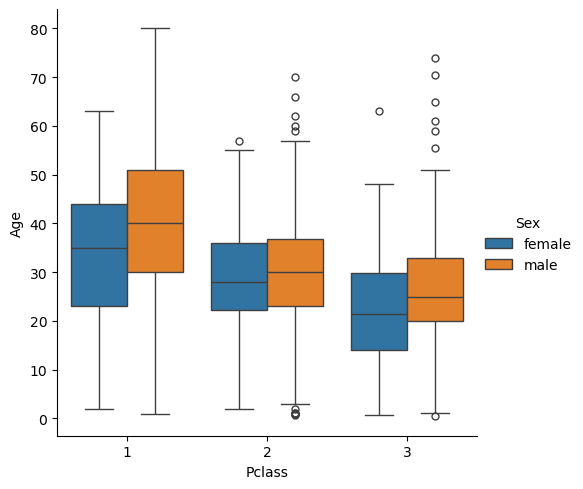

In [55]:
g = sns.catplot(x="Pclass", y="Age", hue="Sex",
               data=df_train,kind="box")
#男生女生的身高特性有差異
# 觀察到不同艙等的年紀不太相同

In [59]:
#將Sex轉型成連續型data
df=data.copy() #複製一份資料給 data
#ValueError: could not convert string to float: 'Male', sklearn 中的 KNN 只能處理數值型態
#轉型 
#透過 preprocessing 轉換
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
display(df[['Age', 'Sex', 'Pclass']])

,Age,Sex,Pclass
0,22.0,1,3
1,38.0,0,1
2,26.0,0,3
3,35.0,0,1
4,35.0,1,3
...,...,...,...
886,27.0,1,2
887,19.0,0,1
888,NaN,0,3
889,26.0,1,1


In [71]:
from sklearn.metrics.pairwise import nan_euclidean_distances
display(pd.DataFrame(nan_euclidean_distances(df[['Age', 'Sex', 'Pclass']])))

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,16.155494,4.123106,13.190906,13.000000,0.000000,32.062439,20.000000,5.099020,8.124038,...,11.000000,1.000000,6.082763,3.000000,17.029386,5.099020,3.741657,1.224745,4.472136,10.000000
1,16.155494,0.000000,12.165525,3.000000,3.741657,2.738613,16.031220,36.069378,11.180340,24.020824,...,5.477226,16.124515,10.099505,13.190906,2.236068,11.090537,19.000000,2.449490,12.041595,6.403124
2,4.123106,12.165525,0.000000,9.219544,9.055385,1.224745,28.089144,24.020824,1.000000,12.041595,...,7.071068,4.000000,2.449490,1.414214,13.000000,1.732051,7.280110,0.000000,2.236068,6.082763
3,13.190906,3.000000,9.219544,0.000000,2.236068,2.738613,19.026298,33.075671,8.246211,21.023796,...,3.000000,13.152946,7.141428,10.246951,4.472136,8.124038,16.000000,2.449490,9.055385,3.741657
4,13.000000,3.741657,9.055385,2.236068,0.000000,0.000000,19.104973,33.000000,8.062258,21.047565,...,2.000000,13.038405,7.071068,10.000000,4.123106,8.062258,16.155494,1.224745,9.219544,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,5.099020,11.090537,1.732051,8.124038,8.062258,1.224745,27.018512,25.019992,1.414214,13.038405,...,6.082763,5.196152,1.000000,2.236068,12.083046,0.000000,8.124038,1.732051,1.414214,5.099020
887,3.741657,19.000000,7.280110,16.000000,16.155494,2.738613,35.014283,17.146428,8.246211,5.099020,...,14.177447,3.605551,9.110434,6.403124,20.099751,8.124038,0.000000,2.449490,7.071068,13.190906
888,1.224745,2.449490,0.000000,2.449490,1.224745,1.224745,2.738613,1.224745,0.000000,1.224745,...,1.224745,0.000000,1.732051,1.224745,0.000000,1.732051,2.449490,0.000000,2.738613,1.224745
889,4.472136,12.041595,2.236068,9.055385,9.219544,2.449490,28.000000,24.083189,2.449490,12.083046,...,7.280110,4.582576,2.236068,2.236068,13.190906,1.414214,7.071068,2.738613,0.000000,6.324555


In [65]:
#運用KNN補值
#計算資料點的距離
data=df[['Sex','Age','Pclass']]
# KNN
#設定用多少鄰居資訊來補值
value_neighbors=1
from sklearn.impute import KNNImputer
#進行 KNN的一些設定
imputer = KNNImputer(n_neighbors=value_neighbors)
#把資料放進去，進行補值
df_filled = pd.DataFrame(imputer.fit_transform(data))
#只呈現有遺失值的資料
display(data[missing_index.values==True])
#只呈現有遺失值的資料-呈現補值的結果
display(df_filled[missing_index.values==True])


,Sex,Age,Pclass
5,1,NaN,3
17,1,NaN,2
19,0,NaN,3
26,1,NaN,3
28,0,NaN,3
...,...,...,...
859,1,NaN,3
863,0,NaN,3
868,1,NaN,3
878,1,NaN,3


,0,1,2
5,1.0,22.0,3.0
17,1.0,35.0,2.0
19,0.0,26.0,3.0
26,1.0,22.0,3.0
28,0.0,26.0,3.0
...,...,...,...
859,1.0,22.0,3.0
863,0.0,26.0,3.0
868,1.0,22.0,3.0
878,1.0,22.0,3.0
